Considere dois métodos A e B, onde desejamos comparar os seus desempenhos.

In [1]:
#dado sintético 
set.seed(1)
trials <- 30
MethodA <- rnorm(trials, mean=10, sd = 2)
MethodB <- rnorm(trials, mean=11, sd = 2)

,MethodA,MethodB
,<dbl>,<dbl>
1,8.747092,13.717359
2,10.367287,10.794425
3,8.328743,11.775343
4,13.190562,10.892390
5,10.659016,8.245881
6,8.359063,10.170011


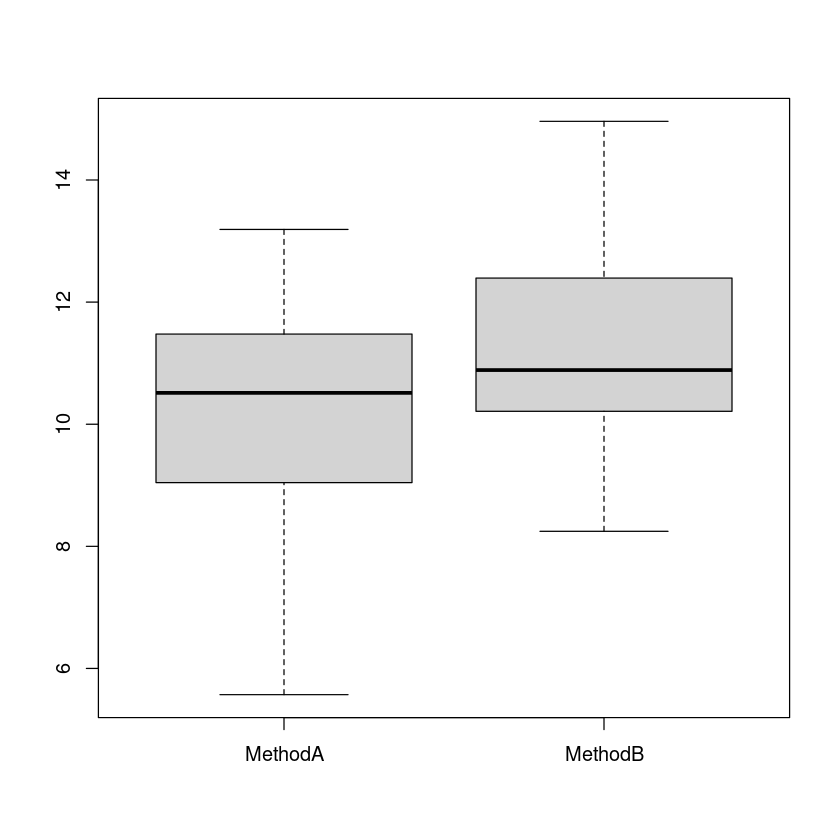

In [2]:
data <- data.frame(MethodA, MethodB)
head(data)
boxplot(data)

Realizando teste de normalidade usando Shapiro-Wilk

Hipotese nula: não há evidência que a distribuição não seja normal (p-value >= 0.05)

Hipotese alternativa: a distribuição não é normal (p-value < 0.05)

In [3]:
shapiro.test(MethodA)


	Shapiro-Wilk normality test

data:  MethodA
W = 0.95011, p-value = 0.1703


In [4]:
shapiro.test(MethodB)


	Shapiro-Wilk normality test

data:  MethodB
W = 0.98568, p-value = 0.9482


Realizando um segundo teste de usando Anderson-Darling

In [5]:
library(nortest)

In [6]:
ad.test(MethodA)


	Anderson-Darling normality test

data:  MethodA
A = 0.48213, p-value = 0.2142


In [7]:
ad.test(MethodB)


	Anderson-Darling normality test

data:  MethodB
A = 0.19575, p-value = 0.8818


Em sendo normal, pode-se aplicar o t-test.

A hipótese nula é que não evidência de diferença entre A e B (p-value >= 0.05)

A hipótese alternativa há diferença entre A e B (p-value < 0.05)


Há duas situações. 

Situação #1: A primeira é quando se quer comparar a média de A e B. Neste caso a comparação é das amostras. 

In [8]:
res <- t.test(MethodA, MethodB, paired=FALSE)
res


	Welch Two Sample t-test

data:  MethodA and MethodB
t = -2.4722, df = 56.741, p-value = 0.01645
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.992223 -0.209043
sample estimates:
mean of x mean of y 
 10.16492  11.26555 


In [9]:
resL <- t.test(MethodA, MethodB, paired=FALSE, alternative = "less")
resL
resG <- t.test(MethodA, MethodB, paired=FALSE, alternative = "greater")
resG


	Welch Two Sample t-test

data:  MethodA and MethodB
t = -2.4722, df = 56.741, p-value = 0.008225
alternative hypothesis: true difference in means is less than 0
95 percent confidence interval:
       -Inf -0.3561861
sample estimates:
mean of x mean of y 
 10.16492  11.26555 



	Welch Two Sample t-test

data:  MethodA and MethodB
t = -2.4722, df = 56.741, p-value = 0.9918
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 -1.84508      Inf
sample estimates:
mean of x mean of y 
 10.16492  11.26555 


Situação #2: Se quer comparar se as medidas individuais de A e B. Neste caso a comparação é pareada. 

In [10]:
res <- t.test(MethodA, MethodB, paired=TRUE)
res


	Paired t-test

data:  MethodA and MethodB
t = -2.5339, df = 29, p-value = 0.01694
alternative hypothesis: true mean difference is not equal to 0
95 percent confidence interval:
 -1.9889923 -0.2122734
sample estimates:
mean difference 
      -1.100633 


Execute este mesmo experimento com menos tentativas (trials) (5, 10)

In [11]:
resL <- t.test(MethodA, MethodB, paired=TRUE, alternative = "less")
resL


	Paired t-test

data:  MethodA and MethodB
t = -2.5339, df = 29, p-value = 0.00847
alternative hypothesis: true mean difference is less than 0
95 percent confidence interval:
       -Inf -0.3626054
sample estimates:
mean difference 
      -1.100633 
